In [ ]:
#basic imports
import numpy as np
import pandas as pd
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns

#plotly imports
import plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving data3_var.xlsx to data3_var.xlsx


In [ ]:
df = pd.read_excel('data3_var.xlsx')

dealing with null values

In [ ]:
#np.where(pd.isnull(df)) #finding where the null values are. [output -> row array, column array]

# by knowing column and row values we can find each null value there is in the df
# and since we've realized from the column array(output of above code) that all null values lie in 5,6 and 7 column which are these below.

#df.loc[df['low_diff_rt_correct'].isna()]
df.loc[df['mid_diff_rt_correct'].isna()]
#df.loc[df['high_diff_rt_correct'].isna()]

,Student,total time spent(secs),low_diff_rt,mid_diff_rt,high_diff_rt,low_diff_rt_correct,mid_diff_rt_correct,high_diff_rt_correct,low_diff_score,mid_diff_score,high_diff_score,total score earned,flag,flag when correct,tab_lst
6,BHAWNA NA,299,9.0,23.2,27.6,NaN,NaN,35.0,0.0,0.0,0.6,3,9,1,5
13,JANGGOUHAO DOUNGEL,737,41.8,35.4,70.2,40.0,NaN,150.0,0.2,0.0,0.2,2,3,1,0


In [ ]:
# since the amount of data missing is quite low, we can impute the data

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

df[['low_diff_rt_correct','mid_diff_rt_correct','high_diff_rt_correct']]=imputer.fit_transform(df[['low_diff_rt_correct','mid_diff_rt_correct','high_diff_rt_correct']])

In [ ]:
df.loc[df['Student']== 'JANGGOUHAO DOUNGEL']

,Student,total time spent(secs),low_diff_rt,mid_diff_rt,high_diff_rt,low_diff_rt_correct,mid_diff_rt_correct,high_diff_rt_correct,low_diff_score,mid_diff_score,high_diff_score,total score earned,flag,flag when correct,tab_lst
13,JANGGOUHAO DOUNGEL,737,41.8,35.4,70.2,40.0,NaN,150.0,0.2,0.0,0.2,2,3,1,0


scaling

In [ ]:
var_lst=list(df)[1:] # list of all the numeric variables that we'll use for clustering
var_lst

['total time spent(secs)',
 'low_diff_rt',
 'mid_diff_rt',
 'high_diff_rt',
 'low_diff_rt_correct',
 'mid_diff_rt_correct',
 'high_diff_rt_correct',
 'low_diff_score',
 'mid_diff_score',
 'high_diff_score',
 'total score earned',
 'flag',
 'flag when correct',
 'tab_lst']

In [ ]:
scaled_df = df[var_lst].apply(zscore) #new df with standardized values

In [ ]:
scaled_df.head(2)

,total time spent(secs),low_diff_rt,mid_diff_rt,high_diff_rt,low_diff_rt_correct,mid_diff_rt_correct,high_diff_rt_correct,low_diff_score,mid_diff_score,high_diff_score,total score earned,flag,flag when correct,tab_lst
0,-0.424665,-0.198545,0.003539,-0.667942,-0.213311,0.502066,-0.641299,1.172965,0.512605,1.336306,1.190181,0.594417,1.248477,-1.020204
1,1.621353,0.195455,0.315714,2.436430,-0.858320,0.575555,3.002989,-1.127851,1.219169,-0.267261,-0.023804,-0.271733,0.054621,-0.680136


#####optimal numbers of clusters (elbow and silhouette method)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## elbow method
k_rng = range(1,10)
sse = []
for k in k_rng:
  km = KMeans(n_clusters=k)
  km.fit(scaled_df[var_lst])
  sse.append(km.inertia_)

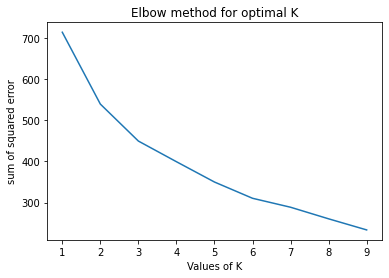

In [ ]:
plt.xlabel('Values of K')
plt.ylabel('sum of squared error')
plt.title('Elbow method for optimal K')
plt.plot(k_rng,sse)

In [ ]:
#sil method
sil = []
k_rng = range(2,8)

for k in k_rng:
  kmeans = KMeans(n_clusters = k).fit(scaled_df[var_lst])
  labels = kmeans.labels_
  sil.append(silhouette_score(scaled_df[var_lst], labels, metric = 'euclidean'))

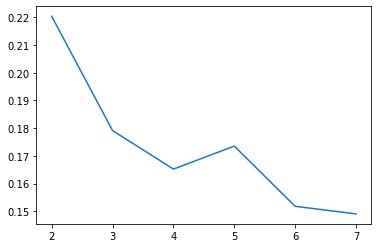

In [ ]:
plt.plot(k_rng,sil)

##### k means on all variables

In [ ]:
## running the kmeans clustering model by taking k as 2 using elbow, silhouette and other methods

km = KMeans(n_clusters = 2)
y_predicted = km.fit_predict(scaled_df[var_lst])#using every variable for k means

print(y_predicted) # Now that we have our clusters, we can begin visualizing our data.
scaled_df['cluster_k_four'] = y_predicted #adding list to df

[0 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 0 1 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1
 1 0 1 0 0 0 1 0 0 0 1 1 1 0]


#####Visualization

> To visualize clustering of high dimensional data we use methods like PCA.

PCA is an algorithm that is used for dimensionality reduction - meaning, informally, that it can take in a DataFrame with many columns and return a DataFrame with a reduced number of columns that still retains much of the information from the columns of the original DataFrame.

The columns of the DataFrame produced from the PCA procedure are called Principal Components(which are just mixtures or linear transformations of the dimensions). We will use these principal components to help us visualize our clusters in 2-D and 3-D space, since we cannot easily visualize the data we have in higher dimensions.

For example, we can use two principal components to visualize the clusters in 2-D space, or three principal components to visualize the clusters in 3-D space.

In [ ]:
# PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# The first df will hold the two principal components returned by the PCA algorithm with n_components=2.
# this df will aid us in our visualization of these clusters in two dimensions (2-D).

# and the second df will hold the results of the PCA algorithm that returns three principal components.
# this df will allow us to visualize the clusters in three dimensional space (3-D).

# We initialize our PCA models:

#PCA with two principal components
pca_2d = PCA(n_components=2)

#PCA with three principal components
pca_3d = PCA(n_components=3)

#This DataFrame contains the two principal components that will be used
#for the 2-D visualization mentioned above
PCs_2d = pd.DataFrame(pca_2d.fit_transform(scaled_df.drop(["cluster_k_four"], axis=1)))

#And this DataFrame contains three principal components that will aid us
#in visualizing our clusters in 3-D
PCs_3d = pd.DataFrame(pca_3d.fit_transform(scaled_df.drop(["cluster_k_four"], axis=1)))

# Note that, above, we performed our PCA's on data that excluded the cluster variable.

In [ ]:
# renaming the columns of these new df's
PCs_2d.columns = ["PC1_2d", "PC2_2d"]
PCs_3d.columns = ["PC1_3d", "PC2_3d", "PC3_3d"]

In [ ]:
# We concatenate these newly created df's to scaled_df so that they can be used by scaled_df as columns.
scaled_df = pd.concat([scaled_df,PCs_2d,PCs_3d], axis=1, join='inner')

In [ ]:
scaled_df.head(2)

,total time spent(secs),low_diff_rt,mid_diff_rt,high_diff_rt,low_diff_rt_correct,mid_diff_rt_correct,high_diff_rt_correct,low_diff_score,mid_diff_score,high_diff_score,total score earned,flag,flag when correct,tab_lst,cluster_k_four,PC1_2d,PC2_2d,PC1_3d,PC2_3d,PC3_3d
0,-0.424665,-0.198545,0.003539,-0.667942,-0.213311,0.502066,-0.641299,1.172965,0.512605,1.336306,1.190181,0.594417,1.248477,-1.020204,0,-0.681874,2.284305,-0.681874,2.284305,1.093658
1,1.621353,0.195455,0.315714,2.436430,-0.858320,0.575555,3.002989,-1.127851,1.219169,-0.267261,-0.023804,-0.271733,0.054621,-0.680136,0,-2.144242,-1.698247,-2.144242,-1.698247,-0.674791


In [ ]:
# now we divide scaled_df, into 2 new df's. Each of these new df's will hold all of the values contained in exactly one of the clusters.
# For example, all of the values contained within the DataFrame, cluster0 will belong to 'cluster 0', and all the values contained in DataFrame, cluster1 will belong to 'cluster 1'.

# Note that all of the DataFrames below are sub-DataFrames of 'scaled_df'.
# This is because we intend to plot the values contained within each of these DataFrames.

cluster0 = scaled_df[scaled_df["cluster_k_four"] == 0]
cluster1 = scaled_df[scaled_df["cluster_k_four"] == 1]

> 2-D visualization:

The next plot displays the two clusters(found through elbow etc and had kmeans applied to) on the two principal components created for 2-D visualization:

In [ ]:
#Instructions for building the 2-D plot

#trace1 is for 'Cluster 0'
trace1 = go.Scatter(
                    x = cluster0["PC1_2d"],
                    y = cluster0["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)

#trace2 is for 'Cluster 1'
trace2 = go.Scatter(
                    x = cluster1["PC1_2d"],
                    y = cluster1["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)

data = [trace1, trace2]

title = "Visualizing Clusters in Two Dimensions Using PCA"

layout = dict(title = title,
              xaxis= dict(title= 'PC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'PC2',ticklen= 10,zeroline= False)
             )

fig = dict(data = data, layout = layout)

iplot(fig)

> 3-D Visualization:

This last plot below displays our clusters on the three principal components created for 3-D visualization:



In [ ]:
#Instructions for building the 3-D plot

#trace1 is for 'Cluster 0'
trace1 = go.Scatter3d(
                    x = cluster0["PC1_3d"],
                    y = cluster0["PC2_3d"],
                    z = cluster0["PC3_3d"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)

#trace2 is for 'Cluster 1'
trace2 = go.Scatter3d(
                    x = cluster1["PC1_3d"],
                    y = cluster1["PC2_3d"],
                    z = cluster1["PC3_3d"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)

data = [trace1, trace2]

title = "Visualizing Clusters in Three Dimensions Using PCA"

layout = dict(title = title,
              xaxis= dict(title= 'PC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'PC2',ticklen= 10,zeroline= False)
             )

fig = dict(data = data, layout = layout)

iplot(fig)

In [ ]:
# click on the figure to move it around

##### Feature selection

> 1.Information gain(one of the filter methods)

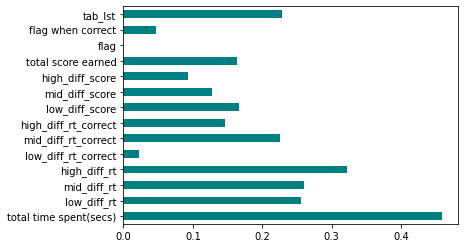

In [ ]:
from sklearn.feature_selection import mutual_info_classif

X = scaled_df[var_lst]  #independent columns
y = scaled_df['cluster_k_four']   #target column i.e cluster

importances = mutual_info_classif(X,y)
feat_importances = pd.Series(importances, var_lst)
feat_importances.plot(kind='barh', color = 'teal')
plt.show()

> Feature importance

[0.16288607 0.10055195 0.05992221 0.08534463 0.02791941 0.06600397
 0.07889784 0.06261083 0.07513317 0.03963079 0.07829222 0.02148005
 0.05956072 0.08176613]


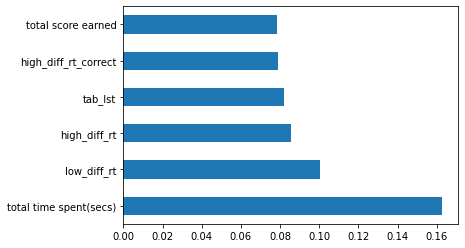

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(6).plot(kind='barh')
plt.show()

> Correlation Matrix with Heatmap

In [ ]:
var_lst_with_cluster = list(scaled_df)[:15]

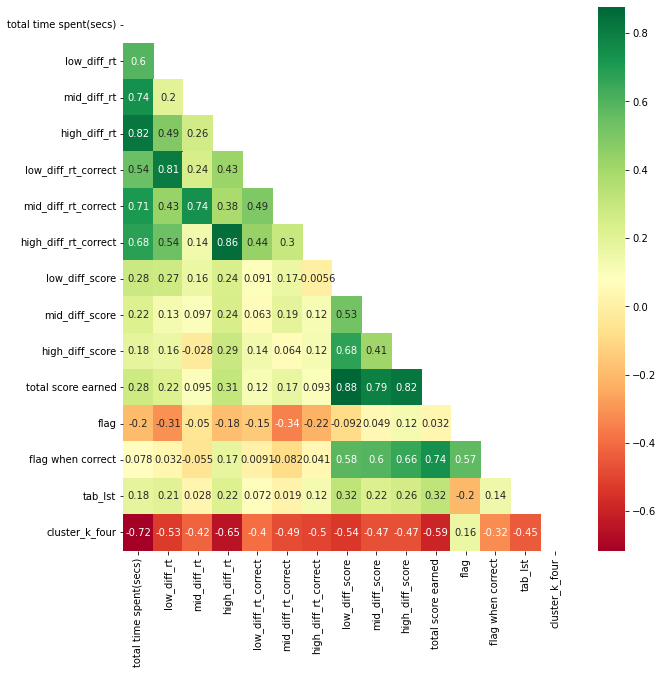

In [ ]:
import seaborn as sns
# get correlations of each features in dataset
corrmat = scaled_df[var_lst_with_cluster].corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
# plot heat map
mask = np.triu(np.ones_like(corrmat))
g=sns.heatmap(scaled_df[top_corr_features].corr(),annot=True,cmap="RdYlGn", mask=mask)

##### clustering using 6 of the most important variables (k=2)

In [ ]:
imp_var_lst = ['total time spent(secs)', 'high_diff_rt', 'low_diff_rt','mid_diff_score','total score earned','tab_lst']

In [ ]:
## running the kmeans clustering model by taking k as 2, we haven't run elbow or silhouette using just these var.
km = KMeans(n_clusters = 2)
y_predicted_imp = km.fit_predict(scaled_df[imp_var_lst])
scaled_df['cluster_k_four_imp'] = y_predicted_imp
y_predicted_imp

array([1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1], dtype=int32)

In [ ]:
# we cannot visualize directly if we have more than 3 variables. we'll have to use pca again to visualize.

In [ ]:
# creating a seperate df consisting of all the important variables only.

#creating a new df #every dataframe that we upload should have variables with these names exactly
data1 = [scaled_df['total time spent(secs)'], scaled_df['high_diff_rt'], scaled_df['low_diff_rt'], scaled_df['mid_diff_score'], scaled_df['total score earned'], scaled_df['tab_lst'], scaled_df['cluster_k_four_imp']]
headers = ['total time spent(secs)', 'high_diff_rt', 'low_diff_rt','mid_diff_score','total score earned','tab_lst','cluster_k_four_imp']

imp_var_df = pd.concat(data1, axis=1, keys=headers)

##### Visualization of clusters found through kmeans on the 6 variables that we've chosen from the feature selection methods (we took k=2, we didnt run elbow/silhouette on these 6 variables alone)

In [ ]:
# PCA with only the imp. variables

#PCA with two principal components
pca_imp_2d = PCA(n_components=2)

#PCA with three principal components
pca_imp_3d = PCA(n_components=3)

#This DataFrame contains the two principal components that will be used
#for the 2-D visualization mentioned above
PCs_imp_2d = pd.DataFrame(pca_imp_2d.fit_transform(imp_var_df.drop(["cluster_k_four_imp"], axis=1)))

#And this DataFrame contains three principal components that will aid us
#in visualizing our clusters in 3-D
PCs_imp_3d = pd.DataFrame(pca_imp_3d.fit_transform(imp_var_df.drop(["cluster_k_four_imp"], axis=1)))

In [ ]:
# renaming the columns of these new df's
PCs_imp_2d.columns = ["PC1_imp_2d", "PC2_imp_2d"]
PCs_imp_3d.columns = ["PC1_imp_3d", "PC2_imp_3d", "PC3_imp_3d"]

In [ ]:
# We concatenate these newly created df's to scaled_df so that they can be used by scaled_df as columns.
imp_var_df = pd.concat([imp_var_df,PCs_imp_2d,PCs_imp_3d], axis=1, join='inner')

In [ ]:
imp_var_df.head(2)

,total time spent(secs),high_diff_rt,low_diff_rt,mid_diff_score,total score earned,tab_lst,cluster_k_four_imp,PC1_imp_2d,PC2_imp_2d,PC1_imp_3d,PC2_imp_3d,PC3_imp_3d
0,-0.424665,-0.667942,-0.198545,0.512605,1.190181,-1.020204,1,0.203051,1.167106,0.203051,1.167106,-1.140817
1,1.621353,2.436430,0.195455,1.219169,-0.023804,-0.680136,0,-2.280524,-0.908242,-2.280524,-0.908242,-1.467590


In [ ]:
cluster0_imp = imp_var_df[imp_var_df["cluster_k_four_imp"] == 0]
cluster1_imp = imp_var_df[imp_var_df["cluster_k_four_imp"] == 1]

> 2-D visualization:

In [ ]:
#Instructions for building the 2-D plot

#trace1_imp is for 'Cluster 0' of imp variables
trace1_imp = go.Scatter(
                    x = cluster0_imp["PC1_imp_2d"],
                    y = cluster0_imp["PC2_imp_2d"],
                    mode = "markers",
                    name = "Cluster 0 imp",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)

#trace2_imp is for 'Cluster 1' of imp variables
trace2_imp = go.Scatter(
                    x = cluster1["PC1_imp_2d"],
                    y = cluster1["PC2_imp_2d"],
                    mode = "markers",
                    name = "Cluster 1 imp",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)

data = [trace1_imp, trace2_imp]

title = "Visualizing Clusters in Two Dimensions Using PCA"

layout = dict(title = title,
              xaxis= dict(title= 'PC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'PC2',ticklen= 10,zeroline= False)
             )

fig = dict(data = data, layout = layout)

iplot(fig)

> 3-D Visualization:

This last plot below displays our clusters on the three principal components created for 3-D visualization:



In [ ]:
#Instructions for building the 3-D plot

#trace1_imp is for 'Cluster 0' of imp variables
trace1_imp = go.Scatter3d(
                    x = cluster0["PC1_imp_3d"],
                    y = cluster0["PC2_imp_3d"],
                    z = cluster0["PC3_imp_3d"],
                    mode = "markers",
                    name = "Cluster 0 imp",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)

#trace2_imp is for 'Cluster 1' of imp variables
trace2_imp = go.Scatter3d(
                    x = cluster1["PC1_imp_3d"],
                    y = cluster1["PC2_imp_3d"],
                    z = cluster1["PC3_imp_3d"],
                    mode = "markers",
                    name = "Cluster 1 imp",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)

data = [trace1_imp, trace2_imp]

title = "Visualizing Clusters in Three Dimensions Using PCA"

layout = dict(title = title,
              xaxis= dict(title= 'PC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'PC2',ticklen= 10,zeroline= False)
             )

fig = dict(data = data, layout = layout)

iplot(fig)

##### Taking 3 most important variables we can easily visualize clustering(k=2) of these three variables without using pca (we can make a 3d graph) (2d graph for two variables). We can't directly visualize 4d or greater dimensional space.